In [351]:
from adjustText import adjust_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from doe_modules.preferences import kwarg_savefig

In [164]:
data = pd.DataFrame({
    "time": [10, 150, 210, 240, 300],
    "pH": [6.938, 7.182, 7.262, 7.328, 7.326],
    "BS": [1040, 699, 581, 455, 371],
    "Na": [124, 132, 133, 135, 138],
    "K": [5.4, 4.1, 4.1, 4.0, 4.2],
    "Cl": [83, 97, 97, 100, 103],
    "Lactate": [3.9, 2.9, 4.1, 3.2, 2.3],
    "Anion Gap": [33.2, 28.7, 29.8, 26.9, 25.2],
    "Base Excess": [-24.9, -21.8, -19.8, -17.8, -16.7],
    "HCO$_3^-$": [7.4, 6.5, 7.2, 8.2, 9.3]
})

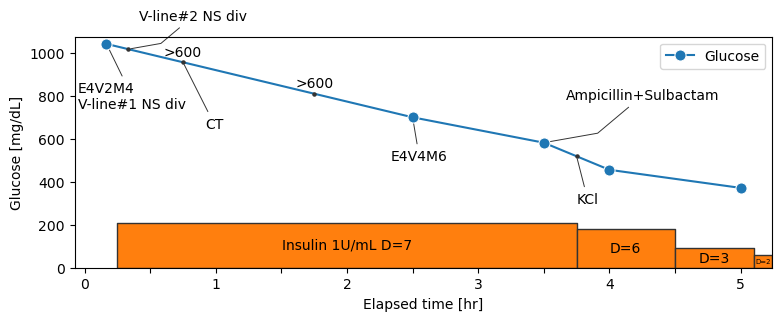

In [501]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.lineplot(data=data, x="time", y="BS", marker="o", ax=ax, markersize=8, label="Glucose")
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlim([*ax.get_xlim()])

txt = []

ap1=dict(
    arrowstyle="-", facecolor=".2", edgecolor=".2",
    connectionstyle="arc", lw=.7
)
ap2=dict(
    arrowstyle="-", facecolor=".2", edgecolor=".2",
    connectionstyle="angle,angleA=40,angleB=10", lw=.7
)
ax.annotate("E4V2M4\nV-line#1 NS div", (10, 1040), (-3, 740), arrowprops=ap1, zorder=-10)
ax.scatter(20, 1040 - 10 * (1040 - 699) / 140, marker=".", color=".2", s=20, zorder=2)
ax.annotate("V-line#2 NS div", (20, 1040 - 10 * (1040 - 699) / 140), (25, 1150), arrowprops=ap2, zorder=-10)
ax.scatter(45, 1040 - 35 * (1040 - 699) / 140, marker=".", color=".2", s=20, zorder=2)
ax.annotate("CT", (45, 1040 - 35 * (1040 - 699) / 140), (55, 650), arrowprops=ap1, zorder=-10)
ax.scatter(105, 1040 - 95 * (1040 - 699) / 140, marker=".", color=".2", s=20, zorder=2)
ax.annotate("E4V4M6", (150, 699), (140, 499), arrowprops=ap1, zorder=-10)
ax.annotate("Ampicillin+Sulbactam", (210, 581), (220, 781), arrowprops=ap2, zorder=-10)
ax.scatter(225, 581 - 15 * (581 - 455) / 30, marker=".", color=".2", s=20, zorder=2)
ax.annotate("KCl", (225, 581 - 15 * (581 - 455) / 30), (225, 300), arrowprops=ap1, zorder=-10)

ax.fill_between([15, 225], 0, 210, color="C1", zorder=-11, edgecolor=".2")
ax.text(120, 105, "Insulin 1U/mL D=7", ha="center", va="center")

ax.fill_between([225, 270], 0, 180, color="C1", zorder=-11, edgecolor=".2")
ax.text(247.5, 90, "D=6", ha="center", va="center")

ax.fill_between([270, 306], 0, 90, color="C1", zorder=-11, edgecolor=".2")
ax.text(288, 45, "D=3", ha="center", va="center")

ax.fill_between([306, ax.get_xlim()[1]], 0, 60, color="C1", zorder=-11, edgecolor=".2")
ax.text(np.mean([306, ax.get_xlim()[1]]), 30, "D=2", ha="center", va="center", size=5)

ax.set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)])
ax.set(ylabel="Glucose [mg/dL]", xlabel="Elapsed time [hr]")

ax.text(45, 1000, ">600", ha="center", va="center")
ax.text(105, 855, ">600", ha="center", va="center")

# ax.legend()

fig.savefig("/home/jovyan/out/bs.png", **kwarg_savefig)

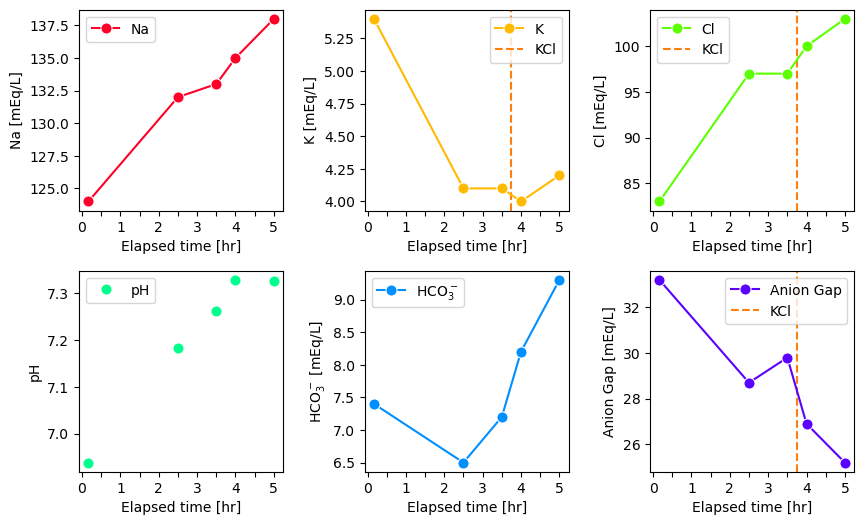

In [344]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=.3)

for i, (a, item, unit) in enumerate(
    zip(
        ax.ravel(), 
        ["Na", "K", "Cl", "pH", "HCO$_3^-$", "Anion Gap"], 
        [" [mEq/L]"] * 3 + [""] + [" [mEq/L]"] * 2
    )
):
    sns.lineplot(
        data=data, x="time", y=item, marker="o", 
        ax=a, label=item, color=plt.cm.gist_rainbow(i/6), 
        markersize=8, linewidth=0 if item == "pH" else None
    )
    a.set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)])
    
    if item == "K" or item == "Cl" or item == "Anion Gap":
        a.set_xlim([*a.get_xlim()])
        a.set_ylim([*a.get_ylim()])
        a.vlines(225, *a.get_ylim(), label="KCl", color="C1", zorder=-10, linestyle="--")
    
    a.set(ylabel=f"{item}{unit}", xlabel="Elapsed time [hr]")
    a.legend()

fig.savefig("/home/jovyan/out/gas.png", **kwarg_savefig)

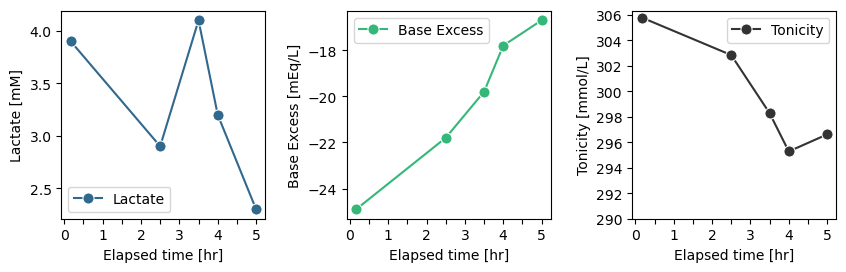

In [810]:
fig, ax = plt.subplots(1, 3, figsize=(10, 2.7))
plt.subplots_adjust(wspace=0.4, hspace=.3)

for i, (a, item, unit) in enumerate(
    zip(
        ax.ravel(), 
        ["Lactate", "Base Excess", "Tonicity"],
        [" [mM]" , " [mEq/L]", " [mmol/L]"]
    )
):
    sns.lineplot(
        data=data.assign(Tonicity= 2 * data.Na + data.BS / 18), 
        x="time", y=item, marker="o", 
        ax=a, label=item, 
        color=plt.cm.viridis((i + 1)/3) if i != 2 else ".2", 
        markersize=8
    )
    
    a.set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)]) 
    
    if item == "Tonicity":
        a.set_yticks(np.arange(290, 307, 2), np.arange(290, 307, 2).astype(int))
    
    a.set(ylabel=f"{item}{unit}", xlabel="Elapsed time [hr]")
    a.legend()

fig.savefig("/home/jovyan/out/gas2.png", **kwarg_savefig)

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(
    data=data.assign(osm= 2 * data.Na + data.BS / 18 + 45.9 / 2.8), 
    x="time", y="osm", marker="o", 
    label="UN:45.9",
    ax=ax, color=".2", 
    markersize=8
)
ax.set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)]) 
ax.set(
    ylabel="Estimated Serum Osmolality\n[mOsm/kgH$_2$O]", 
    xlabel="Elapsed time [hr]",
    title="2Na+(Glu/18)+(UN/2.8)"
)
ax.legend()

fig.savefig("/home/jovyan/out/osm.png", **kwarg_savefig)

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(
    data=data.assign(osm= 2 * data.Na + data.BS / 18), 
    x="time", y="osm", marker="o",
    ax=ax, color=".2", 
    markersize=8
)
ax.set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)]) 
ax.set(
    ylabel="Effective Serum Osmolality\n[mOsm/kgH$_2$O]", 
    xlabel="Elapsed time [hr]",
    title="2Na+(Glu/18)"
)

fig.savefig("/home/jovyan/out/tonicity.png", **kwarg_savefig)

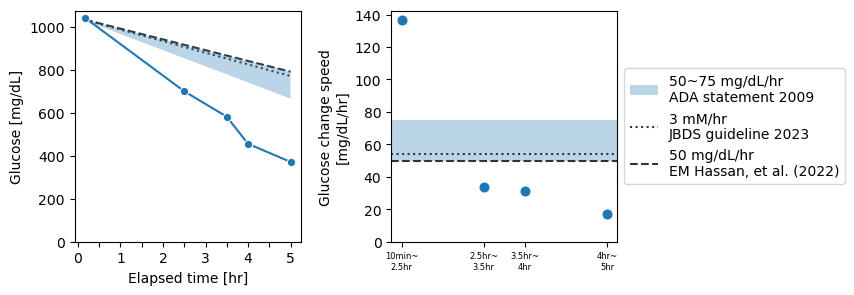

In [797]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
plt.subplots_adjust(wspace=0.4)

sns.lineplot(data=data, x="time", y="BS", marker="o", ax=ax[0])
ax[0].set(ylabel="Glucose [mg/dL]", xlabel="Elapsed time [hr]")
ax[0].set_ylim([0, ax[0].set_ylim()[1]])
ax[0].set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)])
ax[0].fill_between(
    data.time, 1040 - 50 * data.time / 60, 1040 - 75 * data.time / 60, alpha=.3
)
ax[0].plot(data.time, 1040 - 54 * data.time / 60, color=".2", zorder=-10, linestyle=":")
ax[0].plot(data.time, 1040 - 50 * data.time / 60, color=".2", zorder=-10, linestyle="--")

sns.lineplot(
    data=data.assign(descend=-data.BS.diff() / data.time * 60), 
    x="time", y="descend", 
    marker="o", linewidth=0, markersize=8,
    ax=ax[1]
)
ax[1].set(ylabel="Glucose change speed\n[mg/dL/hr]", xlabel="")
ax[1].set_xticks(
    data.time[1:], 
    [
        "10min~\n2.5hr", "2.5hr~\n3.5hr", "3.5hr~\n4hr", "4hr~\n5hr", 
        # "5hr~\n7.5hr", "7.5hr~\n10.5hr", "10.5hr~\n16.5hr"
    ],
    fontsize=6
)
ax[1].set_xlim([*ax[1].get_xlim()])
ax[1].set_ylim([0, ax[1].set_ylim()[1]])
ax[1].fill_between(
    [0, 400], [50, 50], [75, 75], alpha=.3,
    label="50~75 mg/dL/hr\nADA statement 2009"
)
ax[1].hlines(54, *ax[1].get_xlim(), color=".2", linestyle=":", label="3 mM/hr\nJBDS guideline 2023")
ax[1].hlines(50, *ax[1].get_xlim(), color=".2", linestyle="--", label="50 mg/dL/hr\nEM Hassan, et al. (2022)")
ax[1].legend(loc="center left", bbox_to_anchor=[1, .5])

fig.savefig("/home/jovyan/out/bs_descend.png", **kwarg_savefig)

In [ ]:
45.9

45.9

In [ ]:
(124 * 2) + (1040 / 18)

305.77777777777777

In [ ]:
(138.2 * 2) + (214 / 18)

288.2888888888889

19:30 ER -> Endocrinology
21:15 D=1

In [622]:
data2 = pd.concat([
    data,
    pd.DataFrame({
        "time": [450, 630, 990],
        "pH": [7.239, 7.329, 7.354],
        "BS": [281, 243, 199],
        "Na": [142, 141, 142],
        "K": [4.5, 4.6, 4.2],
        "Cl": [np.nan, np.nan, np.nan],
        "Lactate": [1.5, 1.1, 1.1],
        "Anion Gap": [np.nan, np.nan, np.nan],
        "Base Excess": [-16.1, -13.8, -9.5],
        "HCO$_3^-$": [11.3, 12.1, 16.0]
    })
]).reset_index()

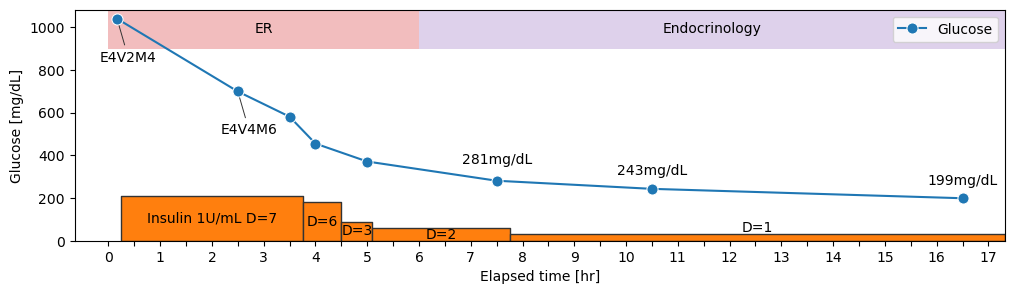

In [806]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.lineplot(data=data2, x="time", y="BS", marker="o", ax=ax, markersize=8, label="Glucose")
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlim([*ax.get_xlim()])

ap1=dict(
    arrowstyle="-", facecolor=".2", edgecolor=".2",
    connectionstyle="arc", lw=.7
)
ax.annotate("E4V2M4", (10, 1040), (-10, 840), arrowprops=ap1, zorder=-10)
ax.annotate("E4V4M6", (150, 699), (130, 499), arrowprops=ap1, zorder=-10)

ax.fill_between([0, 360], 900, ax.get_ylim()[1], color="C3", zorder=-11, alpha=.3, linewidth=0)
ax.text(180, np.mean([900, ax.get_ylim()[1]]), "ER", ha="center", va="center")

ax.fill_between([360, ax.get_xlim()[1]], 900, ax.get_ylim()[1], color="C4", zorder=-11, alpha=.3, linewidth=0)
ax.text(np.mean([360, ax.get_xlim()[1]]), np.mean([900, ax.get_ylim()[1]]), "Endocrinology", ha="center", va="center")

ax.fill_between([15, 225], 0, 210, color="C1", zorder=-11, edgecolor=".2")
ax.text(120, 105, "Insulin 1U/mL D=7", ha="center", va="center")

ax.fill_between([225, 270], 0, 180, color="C1", zorder=-11, edgecolor=".2")
ax.text(247.5, 90, "D=6", ha="center", va="center")

ax.fill_between([270, 306], 0, 90, color="C1", zorder=-11, edgecolor=".2")
ax.text(288, 45, "D=3", ha="center", va="center")

ax.fill_between([306, 465], 0, 60, color="C1", zorder=-11, edgecolor=".2")
ax.text(np.mean([306, 465]), 30, "D=2", ha="center", va="center")

ax.fill_between([465, ax.get_xlim()[1]], 0, 30, color="C1", zorder=-11, edgecolor=".2")
ax.text(np.mean([465, ax.get_xlim()[1]]), 60, "D=1", ha="center", va="center")

ax.set_xticks(np.arange(0, ax.get_xlim()[1], 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, ax.get_xlim()[1].astype(int), 30)])
ax.set(ylabel="Glucose [mg/dL]", xlabel="Elapsed time [hr]")

# ax.text(45, 1000, ">600", ha="center", va="center")
# ax.text(105, 850, ">600", ha="center", va="center")

ax.text(450, 380, "281mg/dL", ha="center", va="center")
ax.text(630, 330, "243mg/dL", ha="center", va="center")
ax.text(990, 280, "199mg/dL", ha="center", va="center")

fig.savefig("/home/jovyan/out/bs_long.png", **kwarg_savefig)

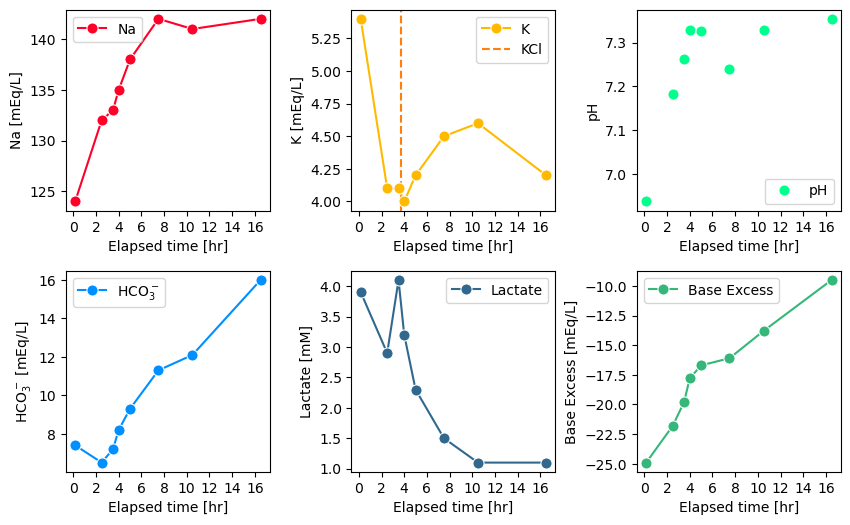

In [624]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=.3)

for i, a, item, unit in zip(
    [0, 1, 3, 4, 6, 7],
    ax.ravel(), 
    ["Na", "K", "pH", "HCO$_3^-$", "Lactate", "Base Excess"], 
    [" [mEq/L]"] * 2 + [""] + [" [mEq/L]",  " [mM]", " [mEq/L]"]
):
    sns.lineplot(
        data=data2, x="time", y=item, marker="o", 
        ax=a, label=item, 
        color=plt.cm.gist_rainbow(i/6) if i < 6 else plt.cm.viridis((i - 5)/3), 
        markersize=8, linewidth=0 if item == "pH" else None
    )
    a.set_xticks(np.arange(0, 1000, 120), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 1000, 120)])
    
    if item == "K" or item == "Cl" or item == "Anion Gap":
        a.set_xlim([*a.get_xlim()])
        a.set_ylim([*a.get_ylim()])
        a.vlines(225, *a.get_ylim(), label="KCl", color="C1", zorder=-10, linestyle="--")
    
    a.set(ylabel=f"{item}{unit}", xlabel="Elapsed time [hr]")
    a.legend()

fig.savefig("/home/jovyan/out/gas_long.png", **kwarg_savefig)

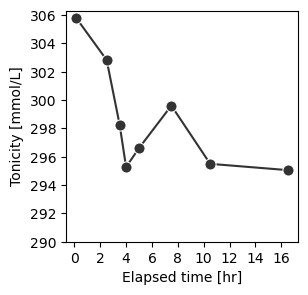

In [805]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(
    data=data2.assign(osm= 2 * data2.Na + data2.BS / 18), 
    x="time", y="osm", marker="o",
    ax=ax, color=".2", 
    markersize=8
)
ax.set_ylim([290, ax.set_ylim()[1]])
ax.set_xticks(np.arange(0, 301, 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 301, 30)]) 
ax.set_yticks(np.arange(290, 307, 2), np.arange(290, 307, 2).astype(int)) 
ax.set(
    ylabel="Tonicity [mmol/L]", 
    xlabel="Elapsed time [hr]"
)
ax.set_xticks(np.arange(0, 1000, 120), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 1000, 120)])

fig.savefig("/home/jovyan/out/tonicity_long.png", **kwarg_savefig)

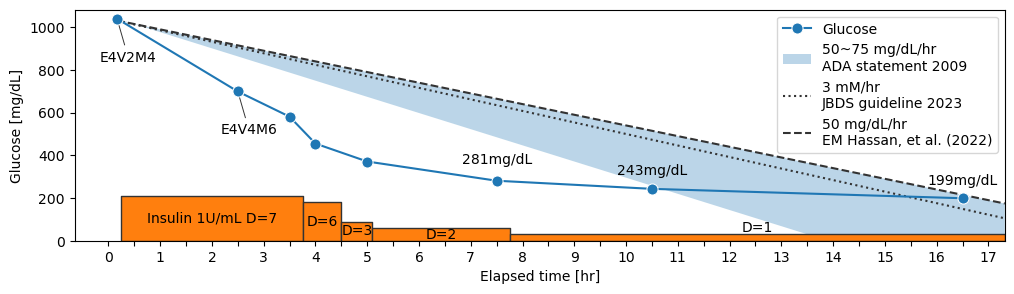

In [883]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.lineplot(data=data2, x="time", y="BS", marker="o", ax=ax, markersize=8, label="Glucose")
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlim([*ax.get_xlim()])

ap1=dict(
    arrowstyle="-", facecolor=".2", edgecolor=".2",
    connectionstyle="arc", lw=.7
)
ap2=dict(
    arrowstyle="-", facecolor=".2", edgecolor=".2",
    connectionstyle="angle,angleA=40,angleB=10", lw=.7
)
ax.annotate("E4V2M4", (10, 1040), (-10, 840), arrowprops=ap1, zorder=-10)
ax.annotate("E4V4M6", (150, 699), (130, 499), arrowprops=ap1, zorder=-10)

ax.fill_between(
    np.linspace(10, ax.get_xlim()[1]), 
    1040 - 50 * np.linspace(10, ax.get_xlim()[1]) / 60, 1040 - 75 * np.linspace(0, ax.get_xlim()[1]) / 60, alpha=.3,
    zorder=-20,
    label="50~75 mg/dL/hr\nADA statement 2009"
)
ax.plot(
    np.linspace(10, ax.get_xlim()[1]), 
    1040 - 54 * np.linspace(10, ax.get_xlim()[1]) / 60, 
    color=".2", zorder=-10, linestyle=":", label="3 mM/hr\nJBDS guideline 2023"
)

ax.plot(
    np.linspace(10, ax.get_xlim()[1]), 
    1040 - 50 * np.linspace(10, ax.get_xlim()[1]) / 60, 
    color=".2", zorder=-10, linestyle="--", label="50 mg/dL/hr\nEM Hassan, et al. (2022)"
)

ax.fill_between([15, 225], 0, 210, color="C1", zorder=-11, edgecolor=".2")
ax.text(120, 105, "Insulin 1U/mL D=7", ha="center", va="center")

ax.fill_between([225, 270], 0, 180, color="C1", zorder=-11, edgecolor=".2")
ax.text(247.5, 90, "D=6", ha="center", va="center")

ax.fill_between([270, 306], 0, 90, color="C1", zorder=-11, edgecolor=".2")
ax.text(288, 45, "D=3", ha="center", va="center")

ax.fill_between([306, 465], 0, 60, color="C1", zorder=-11, edgecolor=".2")
ax.text(np.mean([306, 465]), 30, "D=2", ha="center", va="center")

ax.fill_between([465, ax.get_xlim()[1]], 0, 30, color="C1", zorder=-11, edgecolor=".2")
ax.text(np.mean([465, ax.get_xlim()[1]]), 60, "D=1", ha="center", va="center")

ax.set_xticks(np.arange(0, ax.get_xlim()[1], 30), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, ax.get_xlim()[1].astype(int), 30)])
ax.set(ylabel="Glucose [mg/dL]", xlabel="Elapsed time [hr]")

ax.text(450, 380, "281mg/dL", ha="center", va="center")
ax.text(630, 330, "243mg/dL", ha="center", va="center")
ax.text(990, 280, "199mg/dL", ha="center", va="center")

ax.legend()

fig.savefig("/home/jovyan/out/bs_descend_long.png", **kwarg_savefig)

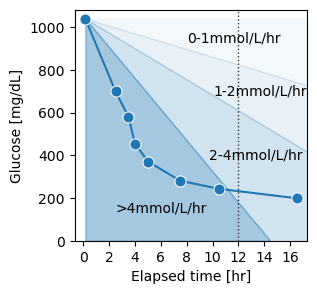

In [728]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(
    data=data2, x="time", y="BS", 
    marker="o", ax=ax, markersize=8
)
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlim([*ax.get_xlim()])
ax.vlines(720, *ax.get_ylim(), color=".2", linestyle=":", linewidth=1)


ax.fill_between(
    [10, ax.get_xlim()[1]], 
    [1040, 1040], [1040, 1040 - 18 * ax.get_xlim()[1] / 60],
    alpha=.05, color="C0"
)
ax.fill_between(
    [10, ax.get_xlim()[1]], 
    [1040, 1040 - 18 * ax.get_xlim()[1] / 60],
    [1040, 1040 - 36 * ax.get_xlim()[1] / 60],
    alpha=.1, color="C0"
)
ax.fill_between(
    [10, ax.get_xlim()[1]], 
    [1040, 1040 - 36 * ax.get_xlim()[1] / 60],
    [1040, 1040 - 72 * ax.get_xlim()[1] / 60],
    alpha=.2, color="C0"
)
ax.fill_betweenx(
    [0, 1040], 
    [10, 10],
    [1040 * 60 / 72, 10],
    alpha=.4, color="C0"
)

ax.text(360, 150, ">4mmol/L/hr", ha="center", va="center")
ax.text(800, 400, "2-4mmol/L/hr", ha="center", va="center")
ax.text(820, 700, "1-2mmol/L/hr", ha="center", va="center")
ax.text(700, 950, "0-1mmol/L/hr", ha="center", va="center")

ax.set_xticks(np.arange(0, ax.get_xlim()[1], 120), [v // 60 if v % 120 == 0 else "" for v in np.arange(0, ax.get_xlim()[1].astype(int), 120)])
ax.set(ylabel="Glucose [mg/dL]", xlabel="Elapsed time [hr]")

fig.savefig("/home/jovyan/out/bs_descend_paper.png", **kwarg_savefig)

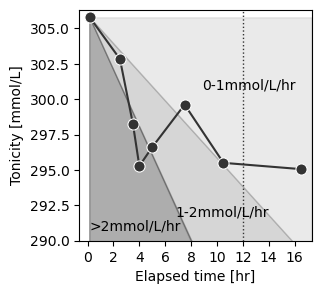

In [822]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(
    data=data2.assign(osm= 2 * data2.Na + data2.BS / 18), 
    x="time", y="osm", marker="o",
    ax=ax, color=".2", 
    markersize=8
)
ax.set_ylim([290, ax.get_ylim()[1]])
ax.set_xlim([*ax.get_xlim()])
ax.set(
    ylabel="Tonicity [mmol/L]", 
    xlabel="Elapsed time [hr]",
)
ax.vlines(720, *ax.get_ylim(), color=".2", linestyle=":", linewidth=1)

ax.fill_between(
    [10, ax.get_xlim()[1]],
    [2 * 124 + 1040 / 18, 2 * 124 + 1040 / 18],
    [2 * 124 + 1040 / 18, 2 * 124 + 1040 / 18 - 1 * ax.get_xlim()[1] / 60],
    alpha=.1, color=".2"
)

ax.fill_between(
    [10, ax.get_xlim()[1]],
    [2 * 124 + 1040 / 18, 2 * 124 + 1040 / 18 - 1 * ax.get_xlim()[1] / 60],
    [2 * 124 + 1040 / 18, 2 * 124 + 1040 / 18 - 2 * ax.get_xlim()[1] / 60],
    alpha=.2, color=".2"
)
ax.fill_betweenx(
    [0, 2 * 124 + 1040 / 18], 
    [10, 10],
    [(2 * 124 + 1040 / 18) * 60 / 2, 10],
    alpha=.4, color=".2"
)

ax.text(220, 291, ">2mmol/L/hr", ha="center", va="center")
ax.text(625, 292, "1-2mmol/L/hr", ha="center", va="center")
ax.text(750, 301, "0-1mmol/L/hr", ha="center", va="center")

ax.set_xticks(np.arange(0, 1000, 120), [v // 60 if v % 60 == 0 else "" for v in np.arange(0, 1000, 120)])

fig.savefig("/home/jovyan/out/tonicity_paper.png", **kwarg_savefig)

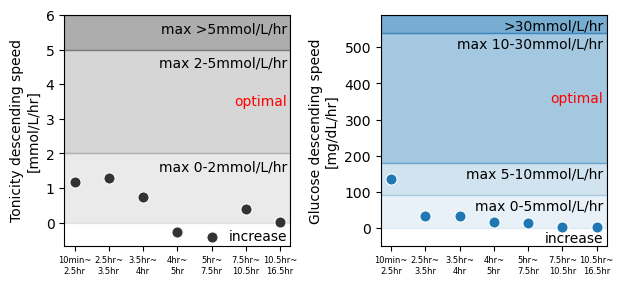

In [882]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
plt.subplots_adjust(wspace=0.4)

sns.lineplot(
    data=data2.assign(descend=-(2 * data2.Na + data2.BS / 18).diff() / data2.time * 60).assign(idx=data2.index), 
    x="idx", y="descend", 
    marker="o", linewidth=0, markersize=8,
    ax=ax[0], c=".2"
)
ax[0].set(ylabel="Tonicity descending speed\n[mmol/L/hr]", xlabel="")
ax[0].set_xticks(
    data2.index[1:], 
    ["10min~\n2.5hr", "2.5hr~\n3.5hr", "3.5hr~\n4hr", "4hr~\n5hr", "5hr~\n7.5hr", "7.5hr~\n10.5hr", "10.5hr~\n16.5hr"],
    fontsize=6
)
ax[0].set_xlim([*ax[0].get_xlim()])
ax[0].fill_between([*ax[0].get_xlim()], [0, 0], [2, 2], alpha=.1, color=".2")
ax[0].fill_between([*ax[0].get_xlim()], [2, 2], [5, 5], alpha=.2, color=".2")
ax[0].set_ylim([ax[0].get_ylim()[0], 6])
ax[0].fill_between([*ax[0].get_xlim()], [5, 5], [ax[0].get_ylim()[1]] * 2, alpha=.4, color=".2")
ax[0].text(7.2, -.4, "increase", ha="right", va="center")
ax[0].text(7.2, 1.6, "max 0-2mmol/L/hr", ha="right", va="center")
ax[0].text(7.2, 4.6, "max 2-5mmol/L/hr", ha="right", va="center")
ax[0].text(7.2, 3.5, "optimal", ha="right", va="center", c="r")
ax[0].text(7.2, 5.6, "max >5mmol/L/hr", ha="right", va="center")

sns.lineplot(
    data=data2.assign(descend=-data2.BS.diff() / data2.time * 60).assign(idx=data2.index), 
    x="idx", y="descend", 
    marker="o", linewidth=0, markersize=8,
    ax=ax[1]
)
ax[1].set(ylabel="Glucose descending speed\n[mg/dL/hr]", xlabel="")
ax[1].set_xticks(
    data2.index[1:], 
    ["10min~\n2.5hr", "2.5hr~\n3.5hr", "3.5hr~\n4hr", "4hr~\n5hr", "5hr~\n7.5hr", "7.5hr~\n10.5hr", "10.5hr~\n16.5hr"],
    fontsize=6
)
ax[1].set_xlim([*ax[1].get_xlim()])
ax[1].fill_between([*ax[1].get_xlim()], [0, 0], [90, 90], alpha=.1, color="C0")
ax[1].fill_between([*ax[1].get_xlim()], [90, 90], [180, 180], alpha=.2, color="C0")
ax[1].fill_between([*ax[1].get_xlim()], [180, 180], [540, 540], alpha=.4, color="C0")
ax[1].set_ylim([-50, 590])
ax[1].fill_between([*ax[1].get_xlim()], [540, 540], [ax[1].get_ylim()[1]] * 2, alpha=.6, color="C0")
ax[1].text(7.2, -30, "increase", ha="right", va="center")
ax[1].text(7.2, 60, "max 0-5mmol/L/hr", ha="right", va="center")
ax[1].text(7.2, 150, "max 5-10mmol/L/hr", ha="right", va="center")
ax[1].text(7.2, 510, "max 10-30mmol/L/hr", ha="right", va="center")
ax[1].text(7.2, 360, "optimal", ha="right", va="center", c="r")
ax[1].text(7.2, ax[1].get_ylim()[1] - 30, ">30mmol/L/hr", ha="right", va="center")

fig.savefig("/home/jovyan/out/descend_paper.png", **kwarg_savefig)

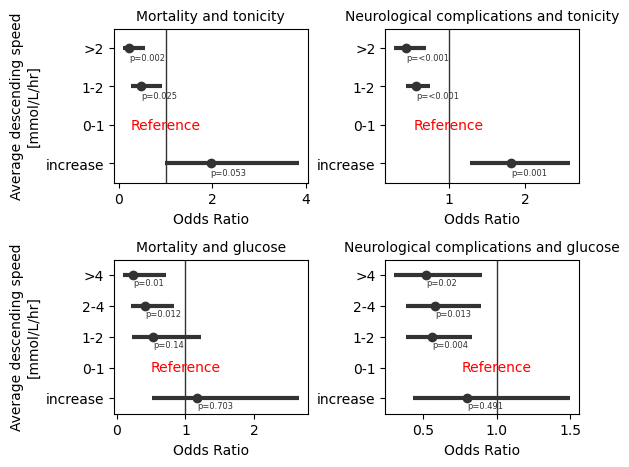

In [972]:
fig, ax = plt.subplots(2, 2, figsize=(6, 5))
plt.subplots_adjust(wspace=.4, hspace=.5)

dfs = {
    "glucose": {
        "m": pd.DataFrame({
            "groups": [">4", "2-4", "1-2", "0-1", "increase"],
            "lower": [0.09, 0.21, 0.23, np.nan, 0.52],
            "point": [0.24, 0.42, 0.53, np.nan, 1.17],
            "upper": [0.72, 0.83, 1.23, np.nan, 2.65],
            "p": [0.010, 0.012, 0.140, np.nan, 0.703]
        }),
        "n": pd.DataFrame({
            "groups": [">4", "2-4", "1-2", "0-1", "increase"],
            "lower": [0.30, 0.38, 0.38, np.nan, 0.43],
            "point": [0.52, 0.58, 0.56, np.nan, 0.80],
            "upper": [0.90, 0.89, 0.83, np.nan, 1.50],
            "p": [0.020, 0.013, 0.004, np.nan, 0.491]
        }),
    },
    "tonicity": {
        "m": pd.DataFrame({
            "groups": [">2", "1-2", "0-1", "increase"],
            "lower": [0.08, 0.25, np.nan, 0.99],
            "point": [0.21, 0.48, np.nan, 1.96],
            "upper": [0.56, 0.91, np.nan, 3.85],
            "p": [0.002, 0.025, np.nan, 0.053]
        }),
        "n": pd.DataFrame({
            "groups": [">2", "1-2", "0-1", "increase"],
            "lower": [0.28, 0.44, np.nan, 1.27],
            "point": [0.44, 0.57, np.nan, 1.82],
            "upper": [0.70, 0.75, np.nan, 2.59],
            "p": ["<0.001", "<0.001", np.nan, 0.001]
        }),
    },
}

for a, item, outcome in zip(
    ax.ravel(), 
    ["tonicity"] * 2 + ["glucose"] * 2, 
    ["m", "n"] * 2
):
    df = dfs[item][outcome]
    for i, g in enumerate(df.index):
        a.hlines(len(df) - 1 - i, df.iloc[i, 1], df.iloc[i, 3], color=".2", linewidth=3) 
        a.scatter(df.iloc[i, 2], len(df) - 1 - i, marker="$Reference$" if df.iloc[i, 2] == 1 else "o", color=".2")
        a.text(
            df.iloc[i, 2] if i != len(df) - 2 else 1,
            len(df) - 1.25 - i if i != len(df) - 2 else 1,
            f"p={df.iloc[i, -1]}" if i != len(df) - 2 else "Reference",
            color=".2" if i != len(df) - 2 else "r",
            size=6 if i != len(df) - 2 else 10,
            ha="left" if i != len(df) - 2 else "center", 
            va="center"
        )
    a.set_yticks(np.arange(len(df)), df.groups[::-1])
    a.set_ylim([-.5, len(df) -.5])
    a.vlines(1, *a.get_ylim(), color=".2", linewidth=1)
    
    title = f"{'Mortality' if outcome == 'm' else 'Neurological complications'} and {item}"
    
    a.set(
        xlabel="Odds Ratio", 
        ylabel="Average descending speed\n[mmol/L/hr]" if outcome == "m" else ""
    )
    a.set_title(title, size="medium")
    
fig.savefig("/home/jovyan/out/forrest.png", **kwarg_savefig)

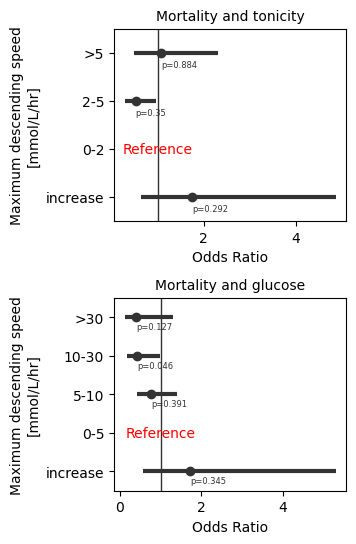

In [992]:
fig, ax = plt.subplots(2, 1, figsize=(3, 6))
plt.subplots_adjust(hspace=.4)

dfs2 = {
    "tonicity": pd.DataFrame({
        "groups": [">5", "2-5", "0-2", "increase"],
        "lower": [0.48, 0.27, np.nan, 0.62],
        "point": [1.06, 0.51, np.nan, 1.74],
        "upper": [2.31, 0.95, np.nan, 4.88],
        "p": [0.884, 0.35, np.nan, 0.292]
    }),
    "glucose": pd.DataFrame({
        "groups": [">30", "10-30", "5-10", "0-5", "increase"],
        "lower": [0.12, 0.18, 0.42, np.nan, 0.56],
        "point": [0.40, 0.42, 0.77, np.nan, 1.72],
        "upper": [1.30, 0.98, 1.40, np.nan, 5.29],
        "p": [0.127, 0.046, 0.391, np.nan, 0.345]
    }),
}

for a, item in zip(
    ax.ravel(), 
    dfs2.keys()
):
    df = dfs2[item]
    for i, g in enumerate(df.index):
        a.hlines(len(df) - 1 - i, df.iloc[i, 1], df.iloc[i, 3], color=".2", linewidth=3) 
        a.scatter(df.iloc[i, 2], len(df) - 1 - i, marker="$Reference$" if df.iloc[i, 2] == 1 else "o", color=".2")
        a.text(
            df.iloc[i, 2] if i != len(df) - 2 else 1,
            len(df) - 1.25 - i if i != len(df) - 2 else 1,
            f"p={df.iloc[i, -1]}" if i != len(df) - 2 else "Reference",
            color=".2" if i != len(df) - 2 else "r",
            size=6 if i != len(df) - 2 else 10,
            ha="left" if i != len(df) - 2 else "center", 
            va="center"
        )
    a.set_yticks(np.arange(len(df)), df.groups[::-1])
    a.set_ylim([-.5, len(df) -.5])
    a.vlines(1, *a.get_ylim(), color=".2", linewidth=1)
    
    title = f"Mortality and {item}"
    
    a.set(
        xlabel="Odds Ratio", 
        ylabel="Maximum descending speed\n[mmol/L/hr]"
    )
    a.set_title(title, size="medium")
    
fig.savefig("/home/jovyan/out/forrest2.png", **kwarg_savefig)

In [1126]:
def errbar(
    point, err, data, ax,
    c=".2", plotcolor="r", ms=100, lw=1, cap=.1,
    digit=1, label=None
):
    ax.vlines(
        .5, point - err, point + err,
        color=c, linewidth=lw
    )
    ax.hlines(
        point - err, .5 - cap / 2, .5 + cap / 2,
        color=c, linewidth=lw
    )
    ax.hlines(
        point + err, .5 - cap / 2, .5 + cap / 2,
        color=c, linewidth=lw
    )
    ax.scatter(.5, point, color=c, s=ms)
    ax.scatter(.5, data, color=plotcolor, s=ms, zorder=10)

    ax.text(
        .4, point + err, 
        point + err if isinstance(point + err, int) else round(point + err, digit), 
        ha="right", va="center"
    )
    ax.text(
        .4, point - err, 
        point - err if isinstance(point - err, int) else round(point - err, digit),  
        ha="right", va="center"
    )
    ax.text(.4, point, point, ha="right", va="center")
    ax.text(.6, data, data, ha="left", va="center", color=plotcolor)
    ax.set_xlim([0, 1])
    ax.tick_params(
        axis='both', which='both', 
        top=False, left=False, right=False, 
        labelleft=False
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    if not label is None:
        ax.set_xticks([.5], [label])

In [1134]:
def errbar2(
    point, low, up, data, ax,
    c=".2", plotcolor="r", ms=100, lw=1, cap=.1,
    label=None
):
    ax.vlines(
        .5, low, up,
        color=c, linewidth=lw
    )
    ax.hlines(
        low, .5 - cap / 2, .5 + cap / 2,
        color=c, linewidth=lw
    )
    ax.hlines(
        up, .5 - cap / 2, .5 + cap / 2,
        color=c, linewidth=lw
    )
    ax.scatter(.5, point, color=c, s=ms, marker=",")
    ax.scatter(.5, data, color=plotcolor, s=ms, zorder=10)

    ax.text(
        .4, up, up,
        ha="right", va="center"
    )
    ax.text(
        .4, low, low,  
        ha="right", va="center"
    )
    ax.text(.4, point, point, ha="right", va="center")
    ax.text(.6, data, data, ha="left", va="center", color=plotcolor)
    ax.set_xlim([0, 1])
    ax.tick_params(
        axis='both', which='both', 
        top=False, left=False, right=False, 
        labelleft=False
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    if not label is None:
        ax.set_xticks([.5], [label])

In [1203]:
def bar(
    kind1, kind2, ratio1, data, ax,
    c=".2", plotcolor="r", ms=100, cap=.4,
    margin=.05,
    digit=2, label=None
):
    ax.fill_between(
        [.5 - cap / 2, .5 + cap / 2],
        [0, 0],
        [ratio1, ratio1],
        color=c, alpha=.4
    )
    ax.fill_between(
        [.5 - cap / 2, .5 + cap / 2],
        [ratio1, ratio1],
        [1, 1],
        color=c, alpha=.2
    )

    ax.scatter(.5, .05 if data == kind1 else .95, color=plotcolor, s=ms, zorder=10)

    ax.text(.5, ratio1 - margin, f"{round(100 * ratio1, digit)}%", ha="center", va="top")
    ax.text(.5, ratio1 + margin, f"{round(100 - round(100 * ratio1, digit), digit)}%", ha="center", va="bottom")
    ax.text(.5, ratio1 / 2, kind1, ha="center", va="center")
    ax.text(.5, (1 + ratio1) / 2, kind2, ha="center", va="center")
    ax.set_xlim([0, 1])
    ax.tick_params(
        axis='both', which='both', 
        top=False, left=False, right=False, 
        labelleft=False
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    if not label is None:
        ax.set_xticks([.5], [label])

In [1204]:
data.iloc[0, :]

time             10.000
pH                6.938
BS             1040.000
Na              124.000
K                 5.400
Cl               83.000
Lactate           3.900
Anion Gap        33.200
Base Excess     -24.900
HCO$_3^-$         7.400
Name: 0, dtype: float64

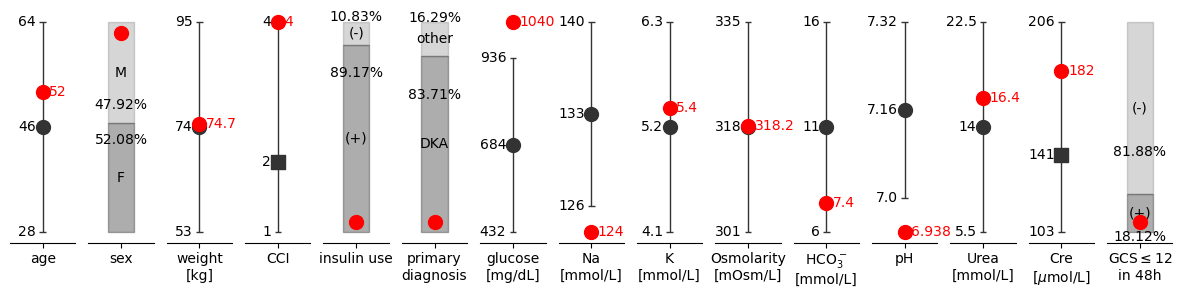

In [1227]:
fig, ax = plt.subplots(1, 15, figsize=(15, 3))

errbar(46, 18, 52, ax[0], label="age")
bar("F", "M", 1279 / 2456, "M", ax[1], label="sex")
errbar(74, 21, 74.7, ax[2], label="weight\n[kg]")
errbar2(2, 1, 4, 4, ax[3], label="CCI")
bar("(+)", "(-)", 2190 / 2456, "(+)", ax[4], label="insulin use", margin=.1)
bar("DKA", "other", 2056 / 2456, "DKA", ax[5], label="primary\ndiagnosis", margin=.15)
errbar(684, 252, 1040, ax[6], label="glucose\n[mg/dL]")
errbar(133, 7, 124, ax[7], label="Na\n[mmol/L]")
errbar(5.2, 1.1, 5.4, ax[8], label="K\n[mmol/L]")
errbar(318, 17, round(2 * 122 + 1040 / 18 + 45.9 / 2.8, 1), ax[9], label="Osmolarity\n[mOsm/L]")
errbar(11, 5, 7.4, ax[10], label="HCO$_3^-$\n[mmol/L]")
errbar(7.16, 0.16, 6.938, ax[11], label="pH", digit=2)
errbar(14, 8.5, round(45.9 / 2.8, 1), ax[12], label="Urea\n[mmol/L]")
errbar2(141, 103, 206, round(2.06 * 88.4), ax[13], label="Cre\n[$\mu$mol/L]")
bar("(+)", "(-)", 445 / 2456, "(+)", ax[14], label="GCS$\leq$12" + "\nin 48h", margin=.17)

fig.savefig("/home/jovyan/out/attributes.png", **kwarg_savefig)

In [1194]:
data2

,index,time,pH,BS,Na,K,Cl,Lactate,Anion Gap,Base Excess,HCO$_3^-$
0,0,10,6.938,1040,124,5.4,83.0,3.9,33.2,-24.9,7.4
1,1,150,7.182,699,132,4.1,97.0,2.9,28.7,-21.8,6.5
2,2,210,7.262,581,133,4.1,97.0,4.1,29.8,-19.8,7.2
3,3,240,7.328,455,135,4.0,100.0,3.2,26.9,-17.8,8.2
4,4,300,7.326,371,138,4.2,103.0,2.3,25.2,-16.7,9.3
5,0,450,7.239,281,142,4.5,NaN,1.5,NaN,-16.1,11.3
6,1,630,7.329,243,141,4.6,NaN,1.1,NaN,-13.8,12.1
7,2,990,7.354,199,142,4.2,NaN,1.1,NaN,-9.5,16.0
